In [32]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
import seaborn as sns
import math 

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('./Documents/all_currencies.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
global df

In [33]:
%matplotlib inline

colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.set(rc={"figure.figsize": (16,8), "axes.titlesize" : 18, "axes.labelsize" : 12, 
"xtick.labelsize" : 14, "ytick.labelsize" : 14 })


In [219]:
def choose_curreny(crypto):
    crypto_month = 0
    c = df[df["Symbol"] == crypto]
    crypto_month = c.loc["2017"].resample('D').mean()
    return crypto_month
crypto_month = choose_curreny("LTC")


Dickey–Fuller test: p=0.966221


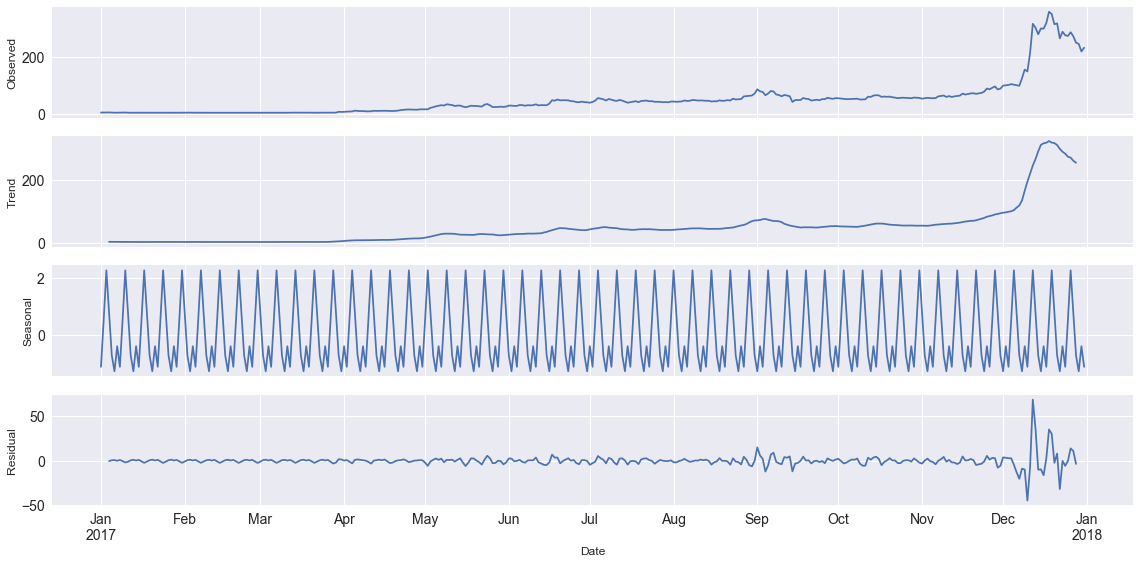

In [220]:
#SEASONAL DECOMPOSITION
seasonal_decompose(crypto_month.Close, model='additive').plot()
print("Dickey–Fuller test: p=%f" % adfuller(crypto_month.Close)[1])

Dickey–Fuller test: p=0.989141


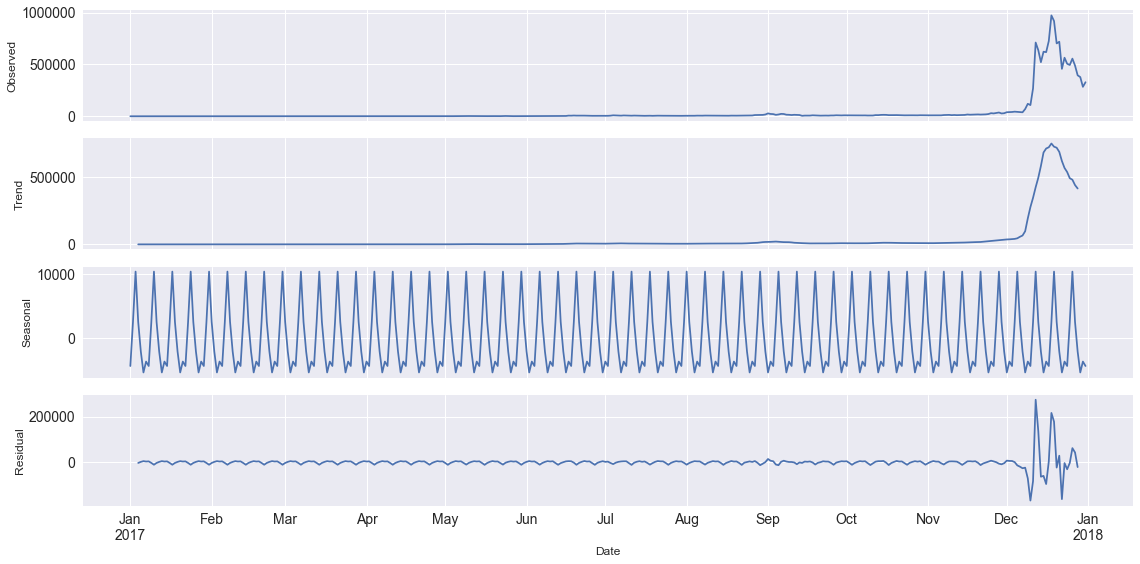

In [221]:
#BOX-COX
crypto_month['close_box']= stats.boxcox(crypto_month.Close,2.5)
seasonal_decompose(crypto_month.close_box, model='additive').plot()
print("Dickey–Fuller test: p=%f" % adfuller(crypto_month.close_box)[1])

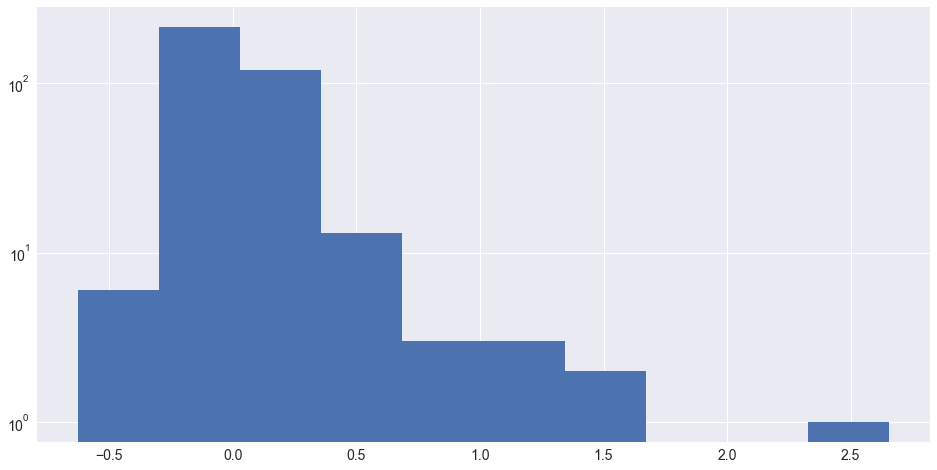

In [222]:
crypto_month["pct change"] = crypto_month.close_box.pct_change()
crypto_month["pct change"].hist(figsize=(16,8))
plt.yscale('log')
daily_volatility = np.std(crypto_month["pct change"])
annual_volatility = daily_volatility * (365)**1/2
daily_drift = np.mean(crypto_month["pct change"])
annual_drift = daily_drift * 365
mean_drift = daily_drift - 0.5 * (daily_volatility)**2
last_price = crypto_month["close_box"][-1]


In [223]:
sim_df=pd.DataFrame()
for x in range(100):
    count = 0
    price_series = []
    last_price = crypto_month['close_box'][-1]
    for y in range(365):
        log_return = mean_drift + (daily_volatility * np.random.normal(0, 1))
        price = last_price * (math.e ** log_return)
        price_series.append(price)
        last_price = price
        count += 1
    sim_df[x] = price_series

In [224]:
from scipy.special import boxcox, inv_boxcox

In [225]:
b=inv_boxcox(sim_df,2.5)


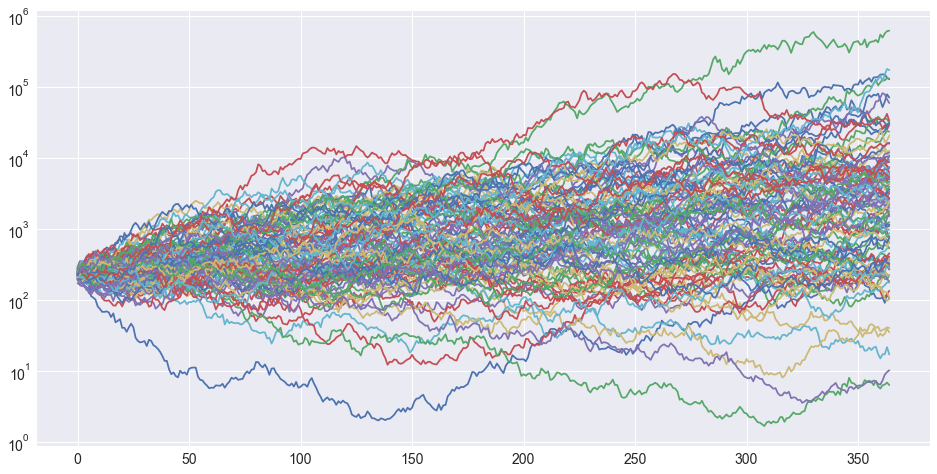

In [226]:
plt.plot(b)
plt.yscale('log')
plt.show()